# Big Data Cup - Data Manipulation



In [10]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,5)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['ytick.major.size'] = 20

In [4]:
#Load original data
scout2 = pd.read_csv("BigDataCup21.csv")
scout2

,Unnamed: 0,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,...,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,0,9/20/2019,Erie Otters,Sudbury Wolves,1,20:00,5,5,0,0,...,Faceoff Win,100,43,Forehand,NaN,NaN,NaN,Connor Lockhart,NaN,NaN
1,1,9/20/2019,Erie Otters,Sudbury Wolves,1,19:58,5,5,0,0,...,Puck Recovery,67,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9/20/2019,Erie Otters,Sudbury Wolves,1,19:53,5,5,0,0,...,Incomplete Play,45,49,Direct,NaN,NaN,NaN,Blake Murray,74.0,35.0
3,3,9/20/2019,Erie Otters,Sudbury Wolves,1,19:52,5,5,0,0,...,Puck Recovery,89,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9/20/2019,Erie Otters,Sudbury Wolves,1,19:51,5,5,0,0,...,Incomplete Play,82,49,Direct,NaN,NaN,NaN,Connor Lockhart,94.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75868,75868,3/8/2020,Erie Otters,Saginaw Spirit,3,0:07,6,5,3,4,...,Puck Recovery,177,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75869,75869,3/8/2020,Erie Otters,Saginaw Spirit,3,0:06,6,5,3,4,...,Play,184,7,Direct,NaN,NaN,NaN,Hayden Fowler,190.0,14.0
75870,75870,3/8/2020,Erie Otters,Saginaw Spirit,3,0:04,6,5,3,4,...,Play,193,23,Direct,NaN,NaN,NaN,Maxim Golod,138.0,26.0
75871,75871,3/8/2020,Erie Otters,Saginaw Spirit,3,0:03,6,5,3,4,...,Shot,137,34,Slapshot,Blocked,t,f,NaN,NaN,NaN


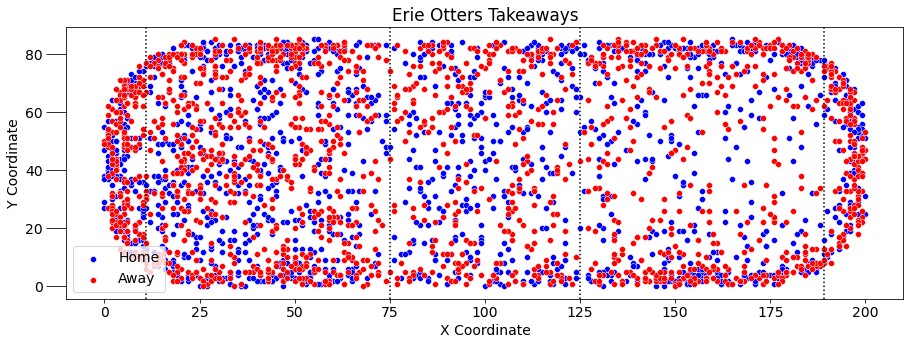

In [11]:
takeaway = ['Takeaway']
take_filter = scout2[scout2['Event'].isin(takeaway)].copy()
otter_home = take_filter.loc[take_filter['Home Team'] == 'Erie Otters']
otter_away = take_filter.loc[take_filter['Away Team'] == 'Erie Otters']

fig, ax = plt.subplots()
sns.scatterplot(x='X Coordinate', y='Y Coordinate',data=otter_home.loc[:, ['X Coordinate', 'Y Coordinate']], color='blue')
sns.scatterplot(x='X Coordinate', y='Y Coordinate',data=otter_away.loc[:, ['X Coordinate', 'Y Coordinate']], color='red')
ax.set_title("Erie Otters Takeaways")
ax.legend(labels=['Home','Away'])

#Zones (All based on X position):
#Neutral Zone: x >= 75 & x <= 125
plt.axvline(75, c='k', ls=':')
plt.axvline(125, c='k', ls=':')

#Offensive Zone (right side): x > 125 x < 189

#Offensive Board: x >= 189
plt.axvline(189, c='k', ls=':')

#Defensive Zone (left side): x < 75 & x > 11

#Defensive Board: x <= 11
plt.axvline(11, c='k', ls=':')

In [12]:
#Defining zones
take_filter.loc[(take_filter['X Coordinate'] >= 75) & (take_filter['X Coordinate'] <= 125), 'zone_name'] = 'Neutral'
take_filter.loc[(take_filter['X Coordinate'] > 125) & (take_filter['X Coordinate'] < 189), 'zone_name'] = 'Off. Zone'
take_filter.loc[(take_filter['X Coordinate'] > 189), 'zone_name'] = 'Off. Board'
take_filter.loc[(take_filter['X Coordinate'] > 11) & (take_filter['X Coordinate'] < 75), 'zone_name'] = 'Def. Zone'
take_filter.loc[(take_filter['X Coordinate'] <= 11), 'zone_name'] = 'Def. Board'

In [13]:
take_filter['zone_name'].value_counts()

Def. Zone     1251
Off. Zone      801
Neutral        617
Def. Board     336
Off. Board     228
Name: zone_name, dtype: int64

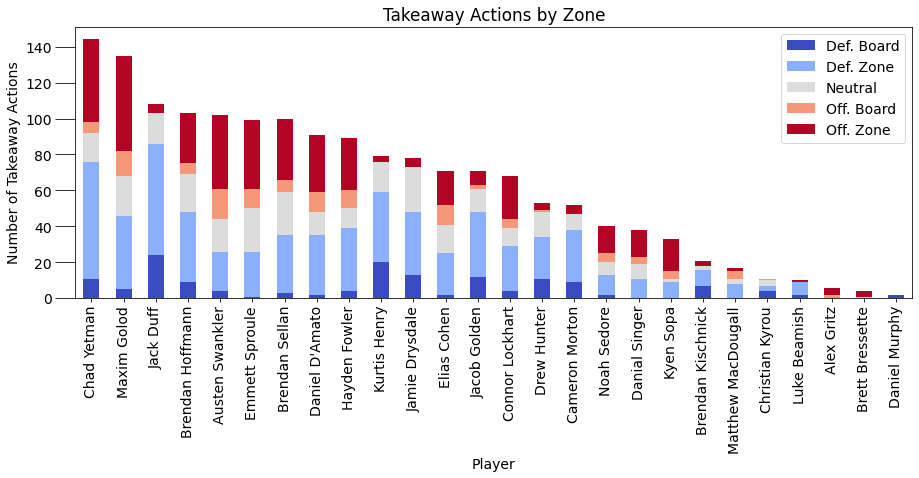

In [14]:
#Takeaway Actions By Zone
re_player = ['Chad Yetman', 'Maxim Golod', 'Jack Duff', 'Brendan Hoffmann', 'Austen Swankler',
            'Emmett Sproule','Brendan Sellan', "Daniel D'Amato", 'Hayden Fowler','Kurtis Henry',
            'Jamie Drysdale', 'Elias Cohen', 'Jacob Golden', 'Connor Lockhart', 'Drew Hunter',
            'Cameron Morton', 'Noah Sedore', 'Danial Singer', 'Kyen Sopa', 'Brendan Kischnick',
            'Matthew MacDougall', 'Christian Kyrou', 'Luke Beamish', 'Alex Gritz', 'Brett Bressette',
            'Daniel Murphy']

cmaps = 'coolwarm'
figsize=(24, 16)
otter_players = take_filter.loc[take_filter['Team'] == 'Erie Otters'].copy()
ax = otter_players.groupby('Player')['zone_name'].value_counts().unstack(1).reindex(re_player).plot.bar(title="Takeaway Actions by Zone",ylabel='Number of Takeaway Actions',stacked=True,cmap=cmaps).legend(loc='best')

In [43]:
#Next event x and y coordinates
#Define next state and xy coordinates
scout2['next_event'] = scout2['Event'].shift(-1)
scout2['next_x'] = scout2['X Coordinate'].shift(-1)
scout2['next_y'] = scout2['Y Coordinate'].shift(-1)

#Define previous state and xy coorindates
scout2['prev_event'] = scout2['Event'].shift(1)
scout2['prev_x'] = scout2['X Coordinate'].shift(1)
scout2['prev_y'] = scout2['Y Coordinate'].shift(1)

#Define zones for scout2
scout2.loc[(scout2['X Coordinate'] >= 75) & (scout2['X Coordinate'] <= 125), 'zone_name'] = 'Neutral'
scout2.loc[(scout2['X Coordinate'] > 125) & (scout2['X Coordinate'] < 189), 'zone_name'] = 'Off. Zone'
scout2.loc[(scout2['X Coordinate'] > 189), 'zone_name'] = 'Off. Board'
scout2.loc[(scout2['X Coordinate'] > 11) & (scout2['X Coordinate'] < 75), 'zone_name'] = 'Def. Zone'
scout2.loc[(scout2['X Coordinate'] <= 11), 'zone_name'] = 'Def. Board'

scout2

,Unnamed: 0,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,...,Player 2,X Coordinate 2,Y Coordinate 2,next_event,next_x,next_y,zone_name,prev_event,prev_x,prev_y
0,0,9/20/2019,Erie Otters,Sudbury Wolves,1,20:00,5,5,0,0,...,Connor Lockhart,NaN,NaN,Puck Recovery,67.0,77.0,Neutral,NaN,NaN,NaN
1,1,9/20/2019,Erie Otters,Sudbury Wolves,1,19:58,5,5,0,0,...,NaN,NaN,NaN,Incomplete Play,45.0,49.0,Def. Zone,Faceoff Win,100.0,43.0
2,2,9/20/2019,Erie Otters,Sudbury Wolves,1,19:53,5,5,0,0,...,Blake Murray,74.0,35.0,Puck Recovery,89.0,36.0,Def. Zone,Puck Recovery,67.0,77.0
3,3,9/20/2019,Erie Otters,Sudbury Wolves,1,19:52,5,5,0,0,...,NaN,NaN,NaN,Incomplete Play,82.0,49.0,Neutral,Incomplete Play,45.0,49.0
4,4,9/20/2019,Erie Otters,Sudbury Wolves,1,19:51,5,5,0,0,...,Connor Lockhart,94.0,46.0,Puck Recovery,64.0,75.0,Neutral,Puck Recovery,89.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75868,75868,3/8/2020,Erie Otters,Saginaw Spirit,3,0:07,6,5,3,4,...,NaN,NaN,NaN,Play,184.0,7.0,Off. Zone,Incomplete Play,197.0,33.0
75869,75869,3/8/2020,Erie Otters,Saginaw Spirit,3,0:06,6,5,3,4,...,Hayden Fowler,190.0,14.0,Play,193.0,23.0,Off. Zone,Puck Recovery,177.0,1.0
75870,75870,3/8/2020,Erie Otters,Saginaw Spirit,3,0:04,6,5,3,4,...,Maxim Golod,138.0,26.0,Shot,137.0,34.0,Off. Board,Play,184.0,7.0
75871,75871,3/8/2020,Erie Otters,Saginaw Spirit,3,0:03,6,5,3,4,...,NaN,NaN,NaN,Puck Recovery,181.0,75.0,Off. Zone,Play,193.0,23.0


In [52]:
#Average x and y positions by player at Takeaway occurrence
#Average next_x and next_y positions are also formed here

player_names = ['Chad Yetman', 'Maxim Golod', 'Jack Duff', 'Brendan Hoffmann', 'Austen Swankler',
            'Emmett Sproule','Brendan Sellan', "Daniel D'Amato", 'Hayden Fowler','Kurtis Henry',
            'Jamie Drysdale', 'Elias Cohen', 'Jacob Golden']
avgx = [] #Current event (Takeaway) x
avgy = [] #Current event (Takeaway) y
avgnx = [] #Next event x
avgny = [] #Next event y

for i in range(len(player_names)):
    x_temp = round(otter_players.loc[otter_players['Player'] == player_names[i], 'X Coordinate'].mean())
    y_temp = round(otter_players.loc[otter_players['Player'] == player_names[i], 'Y Coordinate'].mean())
    nx_temp = round(scout2.loc[(scout2['Player'] == player_names[i]) & 
                               (scout2['Event'] == 'Takeaway'), 'next_x'].mean())
    ny_temp = round(scout2.loc[(scout2['Player'] == player_names[i]) & 
                               (scout2['Event'] == 'Takeaway'), 'next_y'].mean())
    avgx.append(x_temp)
    avgy.append(y_temp)
    avgnx.append(nx_temp)
    avgny.append(ny_temp)

In [53]:
avgx, avgy, avgnx, avgny

([89, 116, 42, 91, 126, 122, 109, 110, 105, 47, 58, 109, 57],
 [43, 45, 39, 47, 39, 41, 46, 34, 37, 36, 54, 44, 51],
 [95, 115, 52, 93, 127, 124, 110, 112, 113, 72, 70, 107, 66],
 [45, 45, 41, 48, 39, 39, 46, 39, 39, 35, 53, 40, 48])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


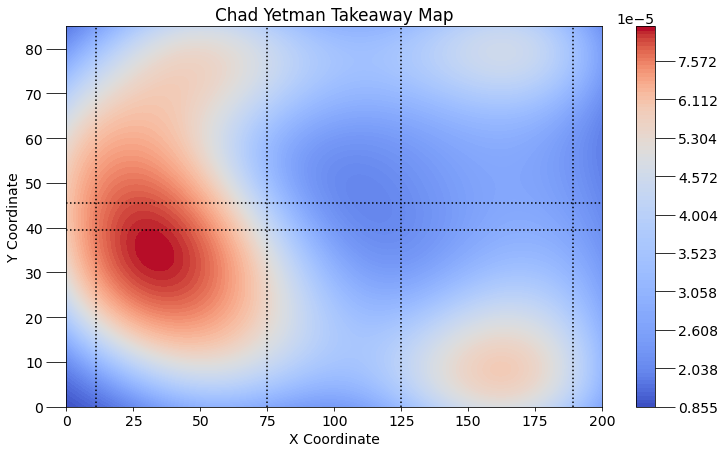

In [46]:
#Heatmaps of Takeaways and Next Event - Chad Yetman and Maxim Golod
events = ['zone_name','Event', 'X Coordinate', 'Y Coordinate', 'prev_event', 'prev_x', 'prev_y', 'next_event', 'next_x', 'next_y']
chad = scout2.loc[(scout2['Player'] == "Chad Yetman") & (scout2['Event'] == 'Takeaway'), events]

fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
ax.set_xlim([0,200])
ax.set_ylim([0,85])


sns.kdeplot(chad['X Coordinate'], chad['Y Coordinate'], fill=True,shade = "True", n_levels = 100, cmap='coolwarm', cbar=True)
ax.set_title("Chad Yetman Takeaway Map")

#Zones (All based on X position):
#Neutral Zone: x >= 75 & x <= 125
plt.axvline(75, c='k', ls=':')
plt.axvline(125, c='k', ls=':')

#Offensive Zone (right side): x > 125 x < 189

#Offensive Board: x >= 189
plt.axvline(189, c='k', ls=':')

#Defensive Zone (left side): x < 75 & x > 11

#Defensive Board: x <= 11
plt.axvline(11, c='k', ls=':')

plt.axhline(45.5, c='k', ls=':')
plt.axhline(39.5, c='k', ls=':')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


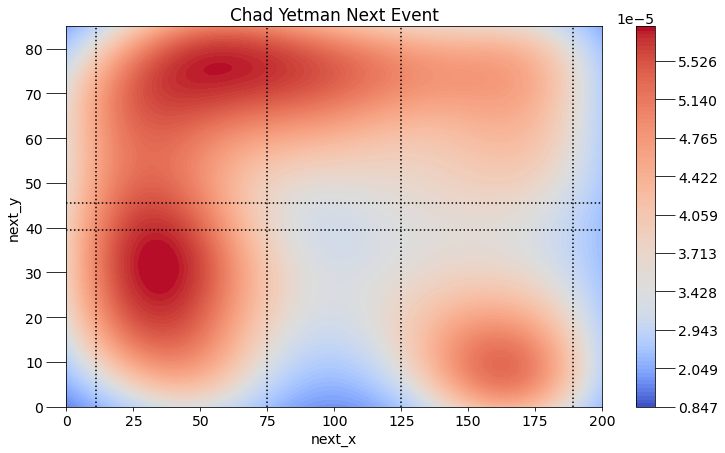

In [47]:
#Next Event - Chad Yetman - Need to fix
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
ax.set_xlim([0,200])
ax.set_ylim([0,85])

sns.kdeplot(chad['next_x'], chad['next_y'], fill=True,shade = "True", n_levels = 100, cmap='coolwarm', cbar=True)
ax.set_title("Chad Yetman Next Event - Incomplete and Complete Plays")
#Zones (All based on X position):
#Neutral Zone: x >= 75 & x <= 125
plt.axvline(75, c='k', ls=':')
plt.axvline(125, c='k', ls=':')

#Offensive Zone (right side): x > 125 x < 189

#Offensive Board: x >= 189
plt.axvline(189, c='k', ls=':')

#Defensive Zone (left side): x < 75 & x > 11

#Defensive Board: x <= 11
plt.axvline(11, c='k', ls=':')

plt.axhline(45.5, c='k', ls=':')
plt.axhline(39.5, c='k', ls=':')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


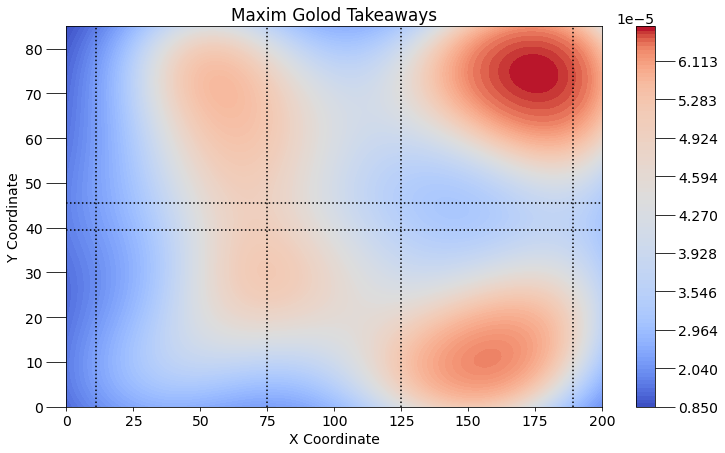

In [55]:
#Maxim Golod Heatmaps
maxim = scout2.loc[(scout2['Player'] == 'Maxim Golod') & (scout2['Event'] == 'Takeaway'), events]

fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
ax.set_xlim([0,200])
ax.set_ylim([0,85])

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more bluerry it loos
sns.kdeplot(maxim['X Coordinate'], maxim['Y Coordinate'], fill=True,shade = "True", n_levels = 100, cmap='coolwarm', cbar=True)
ax.set_title("Maxim Golod Takeaways")
#Zones (All based on X position):
#Neutral Zone: x >= 75 & x <= 125
plt.axvline(75, c='k', ls=':')
plt.axvline(125, c='k', ls=':')

#Offensive Zone (right side): x > 125 x < 189

#Offensive Board: x >= 189
plt.axvline(189, c='k', ls=':')

#Defensive Zone (left side): x < 75 & x > 11

#Defensive Board: x <= 11
plt.axvline(11, c='k', ls=':')

plt.axhline(45.5, c='k', ls=':')
plt.axhline(39.5, c='k', ls=':')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


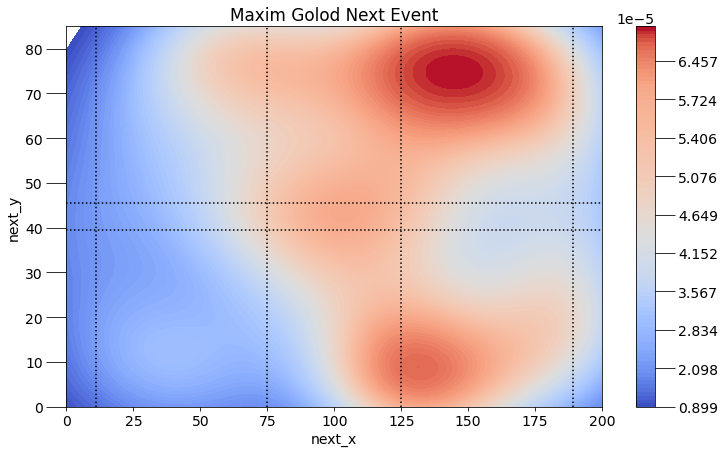

In [56]:
#Maxim Golod - Next Event Heatmap
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
ax.set_xlim([0,200])
ax.set_ylim([0,85])

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more bluerry it loos
sns.kdeplot(maxim['next_x'], maxim['next_y'], fill=True,shade = "True", n_levels = 100, cmap='coolwarm', cbar=True)
ax.set_title("Maxim Golod Next Event")
#Zones (All based on X position):
#Neutral Zone: x >= 75 & x <= 125
plt.axvline(75, c='k', ls=':')
plt.axvline(125, c='k', ls=':')

#Offensive Zone (right side): x > 125 x < 189

#Offensive Board: x >= 189
plt.axvline(189, c='k', ls=':')

#Defensive Zone (left side): x < 75 & x > 11

#Defensive Board: x <= 11
plt.axvline(11, c='k', ls=':')

plt.axhline(45.5, c='k', ls=':')
plt.axhline(39.5, c='k', ls=':')

In [63]:
#Event before Takeaway by zone
zone_prev = scout2.loc[(scout2['Event'] == 'Takeaway'), ['zone_name','prev_event']]
prev_event = scout2.loc[(scout2['Event'] == 'Takeaway') & (scout2['Team'] == 'Erie Otters'), 'prev_event']
zone_prev.value_counts(normalize=True)

zone_name   prev_event     
Def. Zone   Incomplete Play    0.237550
Off. Zone   Incomplete Play    0.173832
Neutral     Incomplete Play    0.111352
Def. Board  Incomplete Play    0.064955
Def. Zone   Zone Entry         0.049180
            Play               0.043922
Off. Zone   Puck Recovery      0.042994
Def. Zone   Puck Recovery      0.042994
Neutral     Play               0.038664
Off. Board  Incomplete Play    0.038045
Neutral     Puck Recovery      0.030622
Off. Board  Puck Recovery      0.025054
Off. Zone   Play               0.023508
Def. Board  Puck Recovery      0.016393
Def. Zone   Takeaway           0.013300
Def. Board  Play               0.013300
Neutral     Takeaway           0.008661
Off. Zone   Takeaway           0.007423
Def. Board  Zone Entry         0.005877
Off. Board  Play               0.004640
Def. Board  Takeaway           0.003402
Off. Board  Takeaway           0.002784
Neutral     Zone Entry         0.001547
dtype: float64

In [64]:
prev_event.value_counts(normalize=True)

Incomplete Play    0.623775
Puck Recovery      0.157475
Play               0.129289
Zone Entry         0.058824
Takeaway           0.030637
Name: prev_event, dtype: float64